In [17]:
import pickle

import matplotlib.pyplot as plt
%matplotlib inline
with open('pickles/DI.pkl', 'rb') as f:
    DI = pickle.load(f)

DI = DI.iloc[0:10]    




In [30]:
from featurizer import DerivativeFeaturizer

spot = 123
index = 0


In [33]:
print 'yp raw'
d = DerivativeFeaturizer(order=1, dx=20.0, reference_time=9, maxmin=False, verbose=True, gauss=False)
yp, tp = d.fit_transform(DI)

yp raw
Taking derivatives of trial 0
Regressed 10 trials in 2 seconds


In [34]:
print 'yp smoothed'
d = DerivativeFeaturizer(order=1, dx=20.0, reference_time=9, maxmin=False, verbose=True, gauss=True, sigma=1)
yps, tps = d.fit_transform(DI)

yp smoothed
Taking derivatives of trial 0
Regressed 10 trials in 2 seconds


In [35]:
print 'ypp raw'
d = DerivativeFeaturizer(order=2, dx=20.0, reference_time=9, maxmin=False, verbose=True, gauss=False, sigma=1)
ypp, tpp = d.fit_transform(DI)

ypp raw
Taking derivatives of trial 0
Regressed 10 trials in 4 seconds


In [36]:
print 'ypp smoothed'
d = DerivativeFeaturizer(order=2, dx=20.0, reference_time=9, maxmin=False, verbose=True, gauss=True)
ypps, tpps = d.fit_transform(DI)

ypp smoothed
Taking derivatives of trial 0
Regressed 10 trials in 4 seconds


In [37]:
print 'yp max'
d = DerivativeFeaturizer(order=1, dx=20.0, reference_time=9, maxmin=True, verbose=True, gauss=False, sigma=1)
ypmax, tpmax = d.fit_transform(DI)

yp max
Taking derivatives of trial 0
Regressed 10 trials in 2 seconds


In [38]:
print 'ypp max'
d = DerivativeFeaturizer(order=2, dx=20.0, reference_time=9, maxmin=True, verbose=True, gauss=False, sigma=1)
yppmax, tppmax = d.fit_transform(DI)

ypp max
Taking derivatives of trial 0
Regressed 10 trials in 4 seconds


In [39]:
print 'both ypp max'
d = DerivativeFeaturizer(order=2, dx=20.0, reference_time=9, maxmin=True, verbose=True, gauss=False, stacked=True)
ypppmax, tpppmax = d.fit_transform(DI)

both ypp max
Taking derivatives of trial 0
Regressed 10 trials in 3 seconds


In [61]:
print ypppmax.iloc[index].shape
print tpppmax.iloc[index].shape

(2, 219)
[ 620.  600.]


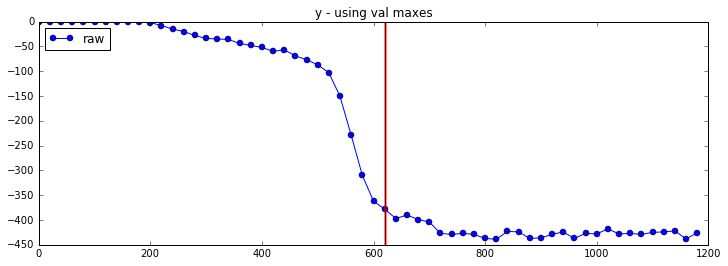

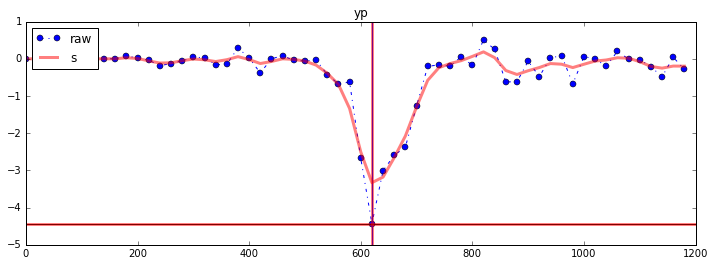

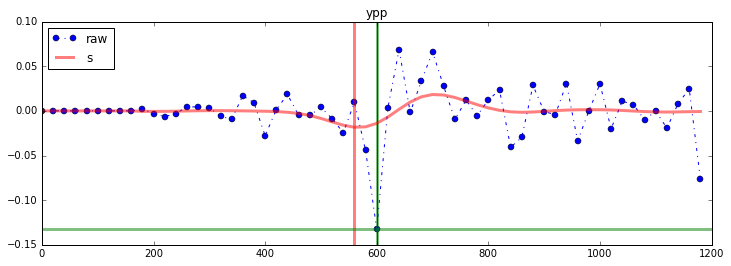

In [65]:
spot = 123
index = 0

plt.figure(figsize=(12,4))
t = DI.iloc[index][:,0]
plt.plot(t, DI.iloc[index][:,spot], 'bo-', label='raw')
# plt.axhline(ypmax.iloc[index][spot], color='k')
plt.axvline(tpmax.iloc[index][spot], color='k')
# plt.axhline(ypppmax.iloc[index][0,spot], color='r', linewidth=3, alpha=0.5)
plt.axvline(tpppmax.iloc[index][0,spot], color='r' ,linewidth=3, alpha=0.5)
plt.legend(loc=2)
plt.title('y - using val maxes')

plt.figure(figsize=(12,4))
plt.plot(t, yp.iloc[index][:,spot], 'bo-.', label='raw')
plt.axvline(tp.iloc[index][spot])
plt.axhline(-ypmax.iloc[index][0,spot], color='k')
plt.plot(t, yps.iloc[index][:,spot], 'r', label='s', linewidth=3, alpha=0.5)
plt.axvline(tps.iloc[index][spot], color='r', linewidth=3, alpha=0.5)
plt.axhline(-ypppmax.iloc[index][0,spot], color='r',linewidth=3, alpha=0.5)
plt.legend(loc=2)
plt.title('yp')

plt.figure(figsize=(12,4))
plt.plot(t, ypp.iloc[index][:,spot], 'bo-.', label='raw')
plt.axvline(tpp.iloc[index][spot])
plt.axvline(tpppmax.iloc[index][1,spot], color='g',linewidth=3, alpha=0.5)
plt.plot(t, ypps.iloc[index][:,spot], 'r', label='s', linewidth=3, alpha=0.5)
plt.axvline(tpps.iloc[index][spot], color='r', linewidth=3, alpha=0.5)
plt.axhline(-ypppmax.iloc[index][1,spot], color='g',linewidth=3, alpha=0.5)
plt.legend(loc=2)
plt.title('ypp')